In [41]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler ## Not use it 
from sklearn.metrics import classification_report ## show model report summary
from sklearn.neighbors import KNeighborsClassifier ## use to find the proper neighbor values
from sklearn.ensemble import RandomForestRegressor ## use to find the important features
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from numpy import array
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("FloodingCleaned.csv")

In [4]:
data.head(5)

,C.35 Ayutthaya (Chao Phraya R.),S.5 Ayutthaya (Pa Sak R.),C.7A Ang Thong (Chao Phraya R.),S.26 Tha Ruea (Pa Sak R.),C.13 Sapphaya (Chao Phraya r.),S.9 Kaeng Khoi (Pa Sak r.),C.35 river/brae,S.5 river/brae,C.7A river/brae,S.26 river/brae,date
0,0.74,0.79,1.02,0.70,0.0,0.0,0.161572,0.168085,0.102,0.08750,2020-08-18
1,0.68,0.76,0.87,0.65,0.0,2.0,0.148472,0.161702,0.087,0.08125,2020-08-19
2,0.30,0.64,0.85,0.64,0.0,0.5,0.065502,0.136170,0.085,0.08000,2020-08-20
3,0.33,0.67,0.90,0.73,3.0,1.5,0.072052,0.142553,0.090,0.09125,2020-08-21
4,0.62,0.59,0.90,0.79,8.0,12.5,0.135371,0.125532,0.090,0.09875,2020-08-22


In [5]:
data.isna().sum()

C.35 Ayutthaya (Chao Phraya R.)    0
S.5 Ayutthaya (Pa Sak R.)          0
C.7A Ang Thong (Chao Phraya R.)    0
S.26 Tha Ruea (Pa Sak R.)          0
C.13 Sapphaya (Chao Phraya r.)     0
S.9 Kaeng Khoi (Pa Sak r.)         0
C.35 river/brae                    0
S.5 river/brae                     0
C.7A river/brae                    0
S.26 river/brae                    0
date                               0
dtype: int64

In [68]:
X = data.drop(columns=['C.35 Ayutthaya (Chao Phraya R.)','date'])
y = data[['C.35 Ayutthaya (Chao Phraya R.)']]

In [69]:
y

,C.35 Ayutthaya (Chao Phraya R.)
0,0.74
1,0.68
2,0.30
3,0.33
4,0.62
...,...
83,4.19
84,4.51
85,4.79
86,4.97


In [70]:
X

,S.5 Ayutthaya (Pa Sak R.),C.7A Ang Thong (Chao Phraya R.),S.26 Tha Ruea (Pa Sak R.),C.13 Sapphaya (Chao Phraya r.),S.9 Kaeng Khoi (Pa Sak r.),C.35 river/brae,S.5 river/brae,C.7A river/brae,S.26 river/brae
0,0.79,1.02,0.70,0.0,0.0,0.161572,0.168085,0.102,0.08750
1,0.76,0.87,0.65,0.0,2.0,0.148472,0.161702,0.087,0.08125
2,0.64,0.85,0.64,0.0,0.5,0.065502,0.136170,0.085,0.08000
3,0.67,0.90,0.73,3.0,1.5,0.072052,0.142553,0.090,0.09125
4,0.59,0.90,0.79,8.0,12.5,0.135371,0.125532,0.090,0.09875
...,...,...,...,...,...,...,...,...,...
83,2.77,7.82,3.44,35.3,0.0,0.914847,0.589362,0.782,0.43000
84,2.98,8.31,3.97,5.5,0.5,0.984716,0.634043,0.831,0.49625
85,3.21,8.60,4.39,0.0,0.0,1.045852,0.682979,0.860,0.54875
86,3.41,8.86,5.38,0.0,0.0,1.085153,0.725532,0.886,0.67250


In [71]:
y

,C.35 Ayutthaya (Chao Phraya R.)
0,0.74
1,0.68
2,0.30
3,0.33
4,0.62
...,...
83,4.19
84,4.51
85,4.79
86,4.97


<AxesSubplot:>

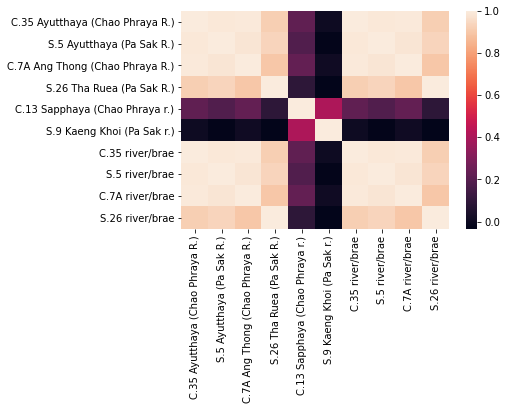

In [18]:
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.8, test_size = 0.2)

In [73]:
X_train

,S.5 Ayutthaya (Pa Sak R.),C.7A Ang Thong (Chao Phraya R.),S.26 Tha Ruea (Pa Sak R.),C.13 Sapphaya (Chao Phraya r.),S.9 Kaeng Khoi (Pa Sak r.),C.35 river/brae,S.5 river/brae,C.7A river/brae,S.26 river/brae
55,0.75,0.99,0.72,1.1,0.5,0.163755,0.159574,0.099,0.09000
73,1.92,5.36,2.05,3.0,0.0,0.622271,0.408511,0.536,0.25625
11,0.78,1.04,0.75,0.0,0.0,0.165939,0.165957,0.104,0.09375
30,0.49,0.98,0.45,0.0,0.0,0.043668,0.104255,0.098,0.05625
40,0.79,1.01,0.99,0.0,40.0,0.189956,0.168085,0.101,0.12375
...,...,...,...,...,...,...,...,...,...
20,0.55,1.04,0.78,30.0,37.0,0.139738,0.117021,0.104,0.09750
60,0.95,1.25,0.82,0.0,0.0,0.207424,0.202128,0.125,0.10250
71,1.53,4.73,1.48,0.0,0.5,0.524017,0.325532,0.473,0.18500
14,0.89,1.08,0.70,0.0,3.0,0.183406,0.189362,0.108,0.08750


In [74]:
X_train.dtypes

S.5 Ayutthaya (Pa Sak R.)          float64
C.7A Ang Thong (Chao Phraya R.)    float64
S.26 Tha Ruea (Pa Sak R.)          float64
C.13 Sapphaya (Chao Phraya r.)     float64
S.9 Kaeng Khoi (Pa Sak r.)         float64
C.35 river/brae                    float64
S.5 river/brae                     float64
C.7A river/brae                    float64
S.26 river/brae                    float64
dtype: object

In [75]:
y_train

,C.35 Ayutthaya (Chao Phraya R.)
55,0.75
73,2.85
11,0.76
30,0.20
40,0.87
...,...
20,0.64
60,0.95
71,2.40
14,0.84


In [85]:
from sklearn import preprocessing
from sklearn import utils

In [91]:
y_train

,C.35 Ayutthaya (Chao Phraya R.)
55,0.75
73,2.85
11,0.76
30,0.20
40,0.87
...,...
20,0.64
60,0.95
71,2.40
14,0.84


In [95]:
Knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

C:\Users\Chom\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


ValueError: Unknown label type: 'continuous'

In [92]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)
#knn = KNeighborsClassifier(n_neighbors=50, metric = 'euclidean')
#knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)

C:\Users\Chom\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
